# Optimisation de la gestion des données de la boutique

Le but est de rapprocher les informations contenues dans l'ERP et le site de vente en ligne.

Il y a 3 fichiers excel qui sont mis à disposition :

- erp.xlsx : Un export de l'ERP qui contient les références des produits, leur prix de vente et leur état de stock.
- web.xlsx : Un export d'une table de l'outil de CMS contenant les informations des produits commercialisés  en ligne (nom, description, nombre de ventes...).
- liaison.xlsx : Un fichier qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU).

## Table des matières

* [Import des librairies et des données](#import)
* [Observation des Dataframes](#dataframe)
* [Rapprochement des exports ERP et Web grâce à Liaison](#liaison)
* [Chiffre d'affaire](#ca)
* [Analyse des prix](#prix)


## Import des librairies et des données : <a name="import"></a>

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

erp = pd.read_excel("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 5 Optimisez la gestion des données d'une boutique avec R ou Python/erp.xlsx")
liaison = pd.read_excel("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 5 Optimisez la gestion des données d'une boutique avec R ou Python/liaison.xlsx")
web = pd.read_excel("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 5 Optimisez la gestion des données d'une boutique avec R ou Python/web.xlsx")


C:\Users\Greg\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Greg\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Greg\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Observation des Dataframes : <a name="dataframe"></a>

In [2]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [3]:
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(erp['product_id'])

0 doublons


Il y a aucune valeur manquante pour ce dataframe et aucun doublon sur la clé primaire (product_id).

In [4]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [5]:
doublons(liaison['id_web'])

90 doublons


In [6]:
doublons(liaison['product_id'])

0 doublons


Il faut faire attention, certaines informations contenues dans la colonne product_id n'ont pas de correspondance dans la colonne id_web, elles sont donc nulles, c'est pour cela qu'il a des doublons pour la colonne id_web.    
Renommer id_web en sku pour garder une continuité avec le dataframe web.

In [7]:
liaison = liaison.rename(columns={'id_web': 'sku'})

In [8]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

On vérifie que le dataframe ne contient aucun doublon pour la clé primaire, ici la colonne sku.

In [9]:
doublons(web['sku'])

798 doublons


On peut voir qu'il a des doublons, pour ce faire on va garder que les produits (on enlève les attachements de la colonne post_type).

In [28]:
web = web.loc[web['post_type'] != 'product']
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [10]:
# On ne garde que les produits.
web = web.loc[web['post_type']=='product']

doublons(web['sku'])

1 doublons


In [11]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                716 non-null    int64         
 2   downloadable           716 non-null    int64         
 3   rating_count           716 non-null    int64         
 4   average_rating         716 non-null    float64       
 5   total_sales            716 non-null    float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            716 non-null    float64       
 9   post_date              716 non-null    datetime64[ns]
 10  post_date_gmt          716 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             716 non-null    object        
 13  post_

On va vérifier la présence de valeurs nulles.

In [12]:
web.loc[web['sku'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On peut voir qu'il y a encore des doublons en clé primaire.  
On va supprimer les valeurs nulles dans le colonne sku.

In [13]:
web = web.dropna(subset=['sku'])

doublons(web['sku'])

0 doublons


In [14]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

Il n'y a plus de présence de doublons pour la clé primaire. Le rapprochement entre les différents dataframe peut être fait.

## Rapprochement des exports ERP et Web grâce à Liaison <a name="liaison"></a>

In [15]:
# On merge (inner) de erp et liaison dans un dataframe intermediaire.
intermediaire = erp.merge(liaison,on='product_id')

# On merge (right) le dataframe intermediaire et web.
ressource  = intermediaire.merge(web, on='sku', how='right')


ressource

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,0,0,0,0.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,7023,1,27.5,15,instock,15891,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,7025,1,69.0,2,instock,15887,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,7247,1,54.8,23,instock,13127-1,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Chiffre d'affaire <a name="ca"></a>

**Le chiffre d’affaire par produit**

In [16]:
# Regroupement des produits
venteParProduit= ressource.groupby(['post_title', 'price'])['total_sales'].sum()

# Réinitialisation de l'index pour replacer les données en colonne due au groupby.
venteParProduit = venteParProduit.reset_index()

# Ajout de la colonne Chiffre d'affaire
venteParProduit["Chiffre d'affaire"] = venteParProduit['price'] * venteParProduit['total_sales']

venteParProduit

,post_title,price,total_sales,Chiffre d'affaire
0,Agnès Levet Côte Rôtie Améthyste 2017,41.2,4.0,164.8
1,Agnès Levet Côte Rôtie Maestria 2017,55.0,3.0,165.0
2,Agnès Levet Côte Rôtie Péroline 2017,57.0,3.0,171.0
3,Alain Graillot Crozes-Hermitage Blanc 2018,24.4,10.0,244.0
4,Alain Graillot Crozes-Hermitage Rouge 2017,24.4,6.0,146.4
...,...,...,...,...
707,Zind-Humbrecht Pinot Gris Roche Calcaire 2017,23.0,0.0,0.0
708,Zind-Humbrecht Riesling Clos Windsbuhl 2014,69.0,0.0,0.0
709,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0,0.0,0.0
710,Zind-Humbrecht Riesling Herrenweg de Turckheim...,31.7,2.0,63.4


**Total chiffre d’affaire réalisé en ligne**

In [17]:
# Somme du chiffre d'affaire des produits pour avoir le chiffre d'affaire global.
totalCA = venteParProduit["Chiffre d'affaire"].sum()

print("Le chiffre d'affaire global est de", round(totalCA,2),"€.")

Le chiffre d'affaire global est de 70568.6 €.


## Analyse des prix <a name="prix"></a>

In [18]:
ressource[['price']].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


La méthode describe donne des informations statistique de base pour la colonne price pour le dataframe.  
Le dataframe dispose de 714 lignes.  
La valeur minimum est de 5,2 € et de 225 € pour la maximum.  
La moyenne est de 32,49 €.  
L'écart type est de 27,81 €.  
La médiane (percentile à 50 %) est à 23,55 €.  
Le premier percentile est à 14,1 % et le troisième à 42,17 €.

In [19]:
print("Le mode est de", ressource['price'].mode())
print("La variance est de", round(ressource['price'].var(ddof=0),2))
print("Le Skewness est de", round(ressource['price'].skew(),2))

Le mode est de 0    19.0
Name: price, dtype: float64
La variance est de 772.34
Le Skewness est de 2.58


La valeur la plus fréquente est de 19 €.  
La variance empirique est de 772,34 €.  
Le skewness est de 2,58, ce qui montre un étalement vers la droite donc vers des prix plus élevés.  
La distribution est asymétrique on ne peut pas mesurer le kurtosis.  

**Représentation graphique de cette répartition**

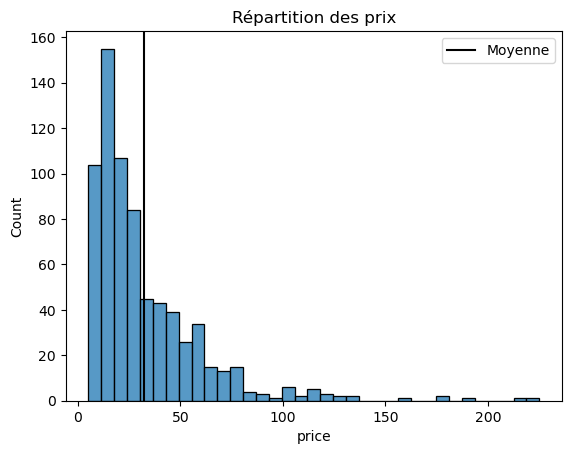

In [20]:
# Récupération de la moyenne
moyenne = ressource['price'].mean()

# Création de l'histogramme
sns.histplot(ressource['price'])

# Affiche la moyenne dans le graphique
plt.axvline(moyenne, color="black", linestyle="-")

plt.legend({"Moyenne":moyenne})
plt.title("Répartition des prix")

plt.show()

La représentation graphique confirme les données qu'on a vu précédemment avec les mêmes valeurs pour le minimum, maximum et la moyenne.  
On peut voir que la répartition des prix tant vers la droite, ce qui confirme la mesure Skweness.  
De plus, il y a une plus forte présense de prix bas que de prix élevé.

**Détection des outliers :**

- **Par Z score**

In [21]:
# Récuparation de l'écart type.
ecartType = ressource['price'].std()

threshold = 2
outlier = []
for i in ressource['price']:
    z = (i-moyenne)/ecartType
    if z > threshold:
        outlier.append(i)
        
print('Le nombre de valeur outlier est de :',len(outlier))        
print('Les prix qui sont outlier :', outlier)

Le nombre de valeur outlier est de : 30
Les prix qui sont outlier : [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


Le calcul par z score montre tous les prix qui sont outlier, il y a 30 prix qui sont concernés.

- **Par l'écart interquartile**

In [22]:
# Premier quantile.
Q1 = ressource['price'].quantile(0.25)
# Troisième quantile.
Q3 = ressource['price'].quantile(0.75)
# Calcul de l'écart interquantile.
iq = Q3 - Q1

# Calcul de la limite des outliers inférieur.
limiteOutlierInf = Q1 - 1.5 * iq
# Calcul de la limite des outliers supérieur.
limiteOutlierSup = Q3 + 1.5 * iq

# Prix en dessous de la limite.
outlierInf = ressource['price'] < limiteOutlierInf
# Prix au dessus de la limite.
outlierSup = ressource['price'] > limiteOutlierSup

print("La limite pour les outlier inferieurs :", round(limiteOutlierInf,2),"\n")
print("Les index qui sont inferieurs aux outlier :\n", np.where(outlierInf)[0],"\n")

print("La limite pour les outlier superieurs :", round(limiteOutlierSup,2),"\n")
print("Les index qui sont superieurs aux outlier :\n", np.where(outlierSup)[0],"\n")

print('Le nombre de valeur outlier est de :', ressource.loc[(ressource['price']>limiteOutlierSup),'price'].count())
print("\n",ressource.loc[(ressource['price']>limiteOutlierSup),('price','post_title')])

La limite pour les outlier inferieurs : -28.01 

Les index qui sont inferieurs aux outlier :
 [] 

La limite pour les outlier superieurs : 84.29 

Les index qui sont superieurs aux outlier :
 [ 64  66 200 202 206 219 220 222 223 228 381 382 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657] 

Le nombre de valeur outlier est de : 32

      price                                         post_title
64   100.0  Zind-Humbrecht Riesling Grand Cru Rangen De Th...
66    88.4  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
200  225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008
202  126.5     Champagne Egly-Ouriet Grand Cru Blanc de Noirs
206   85.6  Champagne Larmandier-Bernier Grand Cru Les Che...
219  176.0                               Cognac Frapin VIP XO
220  108.5              Cognac Frapin Château de Fontpinot XO
222  157.0  Cognac Frapin Château de Fontpinot 1989 20 Ans...
223  104.0                          Cognac Frapin Cigar Blend
228  109.6  C

Les valeurs en dessous de la variable limiteOutlierInf et au-dessus de la variable limiteOutlierSup sont considérée comme outlier.

La limite inférieure étant négative (-25,95 €), il y a donc aucun outlier inférieur qui existe car un prix ne peut pas être négatif et le prix minimum est de 5,20 €. Confirmation avec la présence d'aucun index.

La limite supérieure est de 84,05€. On a vu que le prix maximal est de 225 €, il y a donc évidemment au moins un outlier supérieur. Il y a 32 prix qui sont concernés.

**Représentation graphique en boxplot**

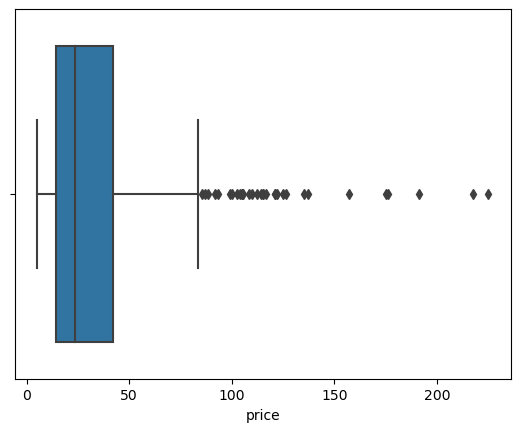

In [23]:
sns.boxplot(x=ressource['price'])

plt.show()

La représentation graphique montre notre quantile Q1 et Q3, ainsi que la médiane. On peut voir la présence des 32 outlier au-dessus de Q3 et leur position en fonction de leur prix.